---
title: "DermaMNIST Dataset Card"
execute:
  eval: true
  echo: false
jupyter: python3
---


In [2]:
import matplotlib.pyplot as plt
import medmnist
import pandas as pd
from medmnist import INFO

In [20]:
info = INFO["dermamnist"]
DataClass = getattr(medmnist, info["python_class"])
data = DataClass(split="train", download=True)

Using downloaded and verified file: /home/saimadhavang/.medmnist/dermamnist.npz


In [8]:
dataset_info = {
    "Name": "DermaMNIST",
    "Purpose": "Lesion classification from dermatoscope images",
    "Dataset ID": "dermamnist",
    "Format": ".npz",
    "Dataset size": f"{len(data)} images",
    "Image Dimensions": "28x28 pixels",
    "Image Channels": "3 (RGB)",
}

# Dataset Info


In [9]:
dataset_info_df = pd.DataFrame(
    list(dataset_info.items()), columns=["Attribute", "Value"]
)
dataset_info_df

,Attribute,Value
0,Name,DermaMNIST
1,Purpose,Lesion classification from dermatoscope images
2,Dataset ID,dermamnist
3,Format,.npz
4,Dataset size,7007 images
5,Image Dimensions,28x28 pixels
6,Image Channels,3 (RGB)


# Dataset Purpose and Provenance


## Purpose of Collection

The DermaMNIST dataset is collected to aid in the development and evaluation of machine learning models for skin lesion classification. Its primary application is in dermatological research and clinical diagnostics.

## Collection Timeline

- Collection Period: 2020 (part of the MedMNIST collection)
- Version: 2.1.0

## Data Collectors and Stakeholders

- Principal Investigators: Jiancheng Yang, et al.
- Institution: Shanghai Jiao Tong University
- Repository: MedMNIST (GitHub: medmnist/medmnist)
- Maintainer: MedMNIST team


# Data Composition and Sensitivity

## Dataset Overview

- Format: .npz (NumPy compressed)
- Data Type: Image-based (RGB, 28x28 resolution)
- Storage Requirements: Approx. 13 MB

## Sensitive Data Assessment

The dataset contains de-identified medical images of skin lesions. While there is no personal health information (PHI), users are advised to follow ethical guidelines for medical data usage.


# Data Quality and Completeness

- Imbalanced Classes: The dataset includes samples across 7 lesion types in unequal proportions.
- Image Quality: Standardized at 28x28 RGB format.


# Statistical Profile


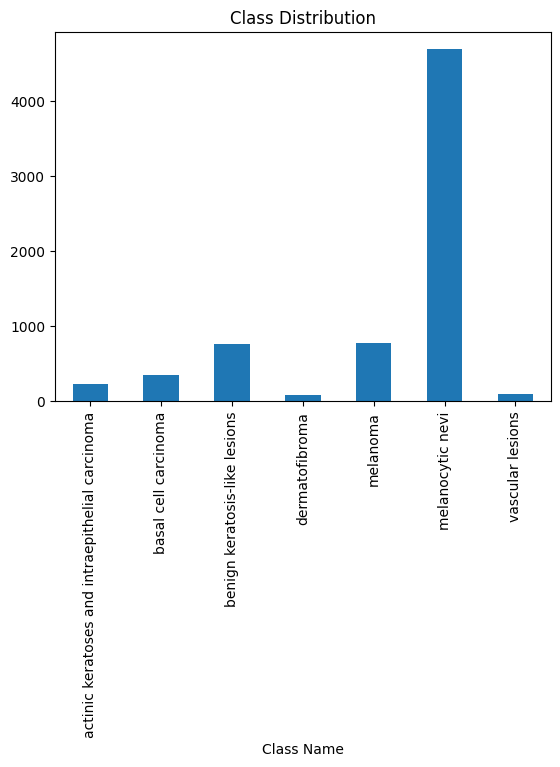

,Class Name,Count
0,actinic keratoses and intraepithelial carcinoma,228
1,basal cell carcinoma,359
2,benign keratosis-like lesions,769
3,dermatofibroma,80
4,melanoma,779
5,melanocytic nevi,4693
6,vascular lesions,99


In [13]:
# Show class distribution and basic statistics
import numpy as np

class_counts = np.bincount(data.labels.squeeze())
class_names = [info["label"][str(i)] for i in range(len(class_counts))]

class_distribution_df = pd.DataFrame({"Class Name": class_names, "Count": class_counts})
class_distribution_df.plot(
    kind="bar", x="Class Name", y="Count", title="Class Distribution", legend=False
)
plt.show()

# Class distribution summary
class_distribution_df

# Sample Records


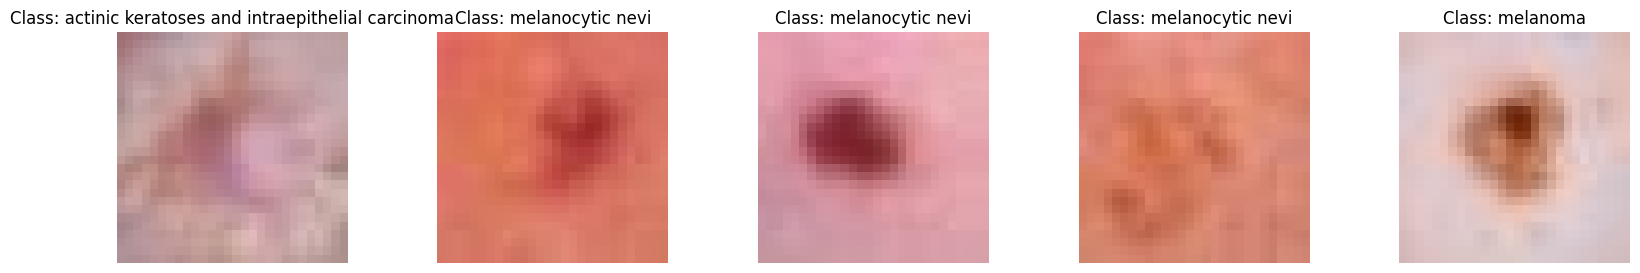

In [18]:
# Display sample images from the dataset
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
for i, ax in enumerate(axes):
    image, label = data[i]
    ax.imshow(image)  # Rearrange for RGB display
    ax.set_title(f"Class: {class_names[label.item()]}")
    ax.axis("off")
plt.show()

# Feature Documentation

The dataset contains only pixel values of the images. There are no additional features or metadata associated with each sample. The classification task involves predicting the correct skin lesion type out of 7 classes:

1. Melanoma
2. Melanocytic nevi
3. Basal cell carcinoma
4. Actinic keratoses
5. Benign keratoses
6. Dermatofibroma
7. Vascular lesions


# Usage Guidelines

## Recommended Applications

- Image Classification Models: For lesion detection and diagnosis.
- Benchmarking: A standard benchmark for medical imaging tasks.
- Educational Use: Ideal for teaching machine learning in medical contexts.

## Known Limitations

- Limited to 28x28 resolution, which may constrain advanced model performance.


# Citation Requirements

```bibtex
@article{yang2021medmnist,
  title={MedMNIST: A Lightweight Benchmark for 2D and 3D Biomedical Image Classification},
  author={Yang, Jiancheng and Shi, Rui and Wei, Donglai and Liu, Zequan and Zhao, Lin and Ke, Bilian and Pfister, Hanspeter and Ni, Bingbing and Xia, Yong},
  journal={arXiv preprint arXiv:2010.14925},
  year={2021}
}
```
